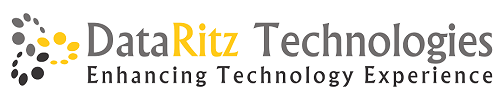

# Topics to be covered

* DataFrame Methods
* Merging Dataframes

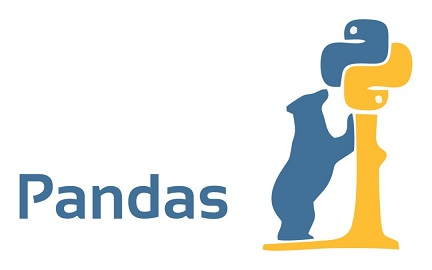

In [1]:
import pandas as pd

In [4]:
data = pd.read_csv('Salary_Data1.csv')

# Data Frame Attributes

In [5]:
# .axes attribute

data.axes

[RangeIndex(start=0, stop=5, step=1),
 Index(['Name', 'Salary', 'Education', 'Occupation', 'rank'], dtype='object')]

In [6]:
# .index
data.index

RangeIndex(start=0, stop=5, step=1)

In [7]:
# .columns
data.columns

Index(['Name', 'Salary', 'Education', 'Occupation', 'rank'], dtype='object')

In [8]:
# .shape
data.shape

(5, 5)

In [9]:
# .info method 
# summarizes the types and columns of a data frame
# When you have larger data sets, this information is useful
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
Name          5 non-null object
Salary        5 non-null int64
Education     5 non-null object
Occupation    5 non-null object
rank          5 non-null int64
dtypes: int64(2), object(3)
memory usage: 280.0+ bytes


# Serialization

Data frames can serialize to many forms. 

The most important functionality is probably converting to and from a CSV file
* pd.read_csv
* pd.to_csv
* .to_dict etc.....

In [10]:
data['annual_data']=data['Salary']*12
data

,Name,Salary,Education,Occupation,rank,annual_data
0,Alex,19159,PhD,Professor,1,229908
1,Tom,10461,X,Business,3,125532
2,Michel,19961,XII,Business,3,239532
3,Hans,821,B.Com,Student,4,9852
4,Biliana,13743,MBA,Private Sector,2,164916


In [11]:
data.to_csv('Salary_update.csv')

In [12]:
data.to_dict()

{'Name': {0: 'Alex', 1: 'Tom', 2: 'Michel', 3: 'Hans', 4: 'Biliana'},
 'Salary': {0: 19159, 1: 10461, 2: 19961, 3: 821, 4: 13743},
 'Education': {0: 'PhD', 1: 'X', 2: 'XII', 3: 'B.Com', 4: 'MBA'},
 'Occupation': {0: 'Professor',
  1: 'Business',
  2: 'Business',
  3: 'Student',
  4: 'Private Sector'},
 'rank': {0: 1, 1: 3, 2: 3, 3: 4, 4: 2},
 'annual_data': {0: 229908, 1: 125532, 2: 239532, 3: 9852, 4: 164916}}

# DataFrame.set_index()

In [13]:
d = data.set_index('Occupation')
d

,Name,Salary,Education,rank,annual_data
Occupation,,,,,
Professor,Alex,19159,PhD,1,229908
Business,Tom,10461,X,3,125532
Business,Michel,19961,XII,3,239532
Student,Hans,821,B.Com,4,9852
Private Sector,Biliana,13743,MBA,2,164916


In [14]:
d = data.set_index(['Occupation','Name'])
d

Salary Education  rank  annual_data
Occupation     Name                                        
Professor      Alex      19159       PhD     1       229908
Business       Tom       10461         X     3       125532
               Michel    19961       XII     3       239532
Student        Hans        821     B.Com     4         9852
Private Sector Biliana   13743       MBA     2       164916

In [15]:
d.loc['Business']

,Salary,Education,rank,annual_data
Name,,,,
Tom,10461,X,3,125532
Michel,19961,XII,3,239532


In [16]:
d.loc[('Business','Tom')]

Salary          10461
Education           X
rank                3
annual_data    125532
Name: (Business, Tom), dtype: object

# .head, .tail

In [17]:
data.head(3)

,Name,Salary,Education,Occupation,rank,annual_data
0,Alex,19159,PhD,Professor,1,229908
1,Tom,10461,X,Business,3,125532
2,Michel,19961,XII,Business,3,239532


In [18]:
data.tail(2)

,Name,Salary,Education,Occupation,rank,annual_data
3,Hans,821,B.Com,Student,4,9852
4,Biliana,13743,MBA,Private Sector,2,164916


# Sorting

Sometimes, we need to sort a data frame by index, or the values in the
columns.

In [19]:
data.sort_values('Name')

,Name,Salary,Education,Occupation,rank,annual_data
0,Alex,19159,PhD,Professor,1,229908
4,Biliana,13743,MBA,Private Sector,2,164916
3,Hans,821,B.Com,Student,4,9852
2,Michel,19961,XII,Business,3,239532
1,Tom,10461,X,Business,3,125532


In [20]:

d1 = data.set_index('Name')
d1

,Salary,Education,Occupation,rank,annual_data
Name,,,,,
Alex,19159,PhD,Professor,1,229908
Tom,10461,X,Business,3,125532
Michel,19961,XII,Business,3,239532
Hans,821,B.Com,Student,4,9852
Biliana,13743,MBA,Private Sector,2,164916


In [21]:
# sort by index ascending order
d1.sort_index()

,Salary,Education,Occupation,rank,annual_data
Name,,,,,
Alex,19159,PhD,Professor,1,229908
Biliana,13743,MBA,Private Sector,2,164916
Hans,821,B.Com,Student,4,9852
Michel,19961,XII,Business,3,239532
Tom,10461,X,Business,3,125532


In [22]:
# sort by index descending order
d1.sort_index(ascending=False)

,Salary,Education,Occupation,rank,annual_data
Name,,,,,
Tom,10461,X,Business,3,125532
Michel,19961,XII,Business,3,239532
Hans,821,B.Com,Student,4,9852
Biliana,13743,MBA,Private Sector,2,164916
Alex,19159,PhD,Professor,1,229908


# Data Frame Statistics

In [23]:
data.describe()

,Salary,rank,annual_data
count,5.00000,5.000000,5.000000
mean,12829.00000,2.600000,153948.000000
std,7771.24842,1.140175,93254.981036
min,821.00000,1.000000,9852.000000
25%,10461.00000,2.000000,125532.000000
50%,13743.00000,3.000000,164916.000000
75%,19159.00000,3.000000,229908.000000
max,19961.00000,4.000000,239532.000000


In [24]:
data.count()

Name           5
Salary         5
Education      5
Occupation     5
rank           5
annual_data    5
dtype: int64

In [25]:
# Example 

newdata = pd.read_csv('Salary_Data_null.csv')
newdata.count()

Name          7
Age           5
Salary        7
Education     6
Occupation    6
Address       2
dtype: int64

# Correlation and Covariance

The data frame offers similar functionality, but it will do a pairwise correlation with all of the numeric columns.

Covariance measures the strength and the direction of the relationship between the elements of two samples, and the sample correlation is derived from the covariance.

Covariance is a measure of a correlation while correlation is a scaled version of covariance.

 Note -  We will discuss in detail in Statistics.

In [34]:
# Lets load weight and height dataset

data = pd.read_csv('age_weight.csv')
data.head(3)

,Age (months),height (inches),weight (pounds)
0,191,62.5,112.5
1,160,62.0,94.5
2,157,64.5,123.5


In [35]:
# correlation
data.corr()

,Age (months),height (inches),weight (pounds)
Age (months),1.000000,0.695635,0.668409
height (inches),0.695635,1.000000,0.808378
weight (pounds),0.668409,0.808378,1.000000


In [36]:
# pair-wise covariance (non-normalized correlation)
data.cov()

,Age (months),height (inches),weight (pounds)
Age (months),367.434833,51.045675,237.391438
height (inches),51.045675,14.654605,57.336923
weight (pounds),237.391438,57.336923,343.293688


# Merging/Joining

* A Data frame is a two-dimensional data structure, i.e., data is aligned in a tabular fashion in rows and columns. 
* We can join, merge, and concat dataframe using different methods.
* In Dataframe df.merge(),df.join(), and df.concat() methods help in joining, merging and concating different dataframe.

# Merging DataFrame

* Pandas have options for high-performance in-memory merging and joining. 
* Joins can only be done on two DataFrames at a time
* There are four basic ways to handle the join (inner, left, right, and outer).


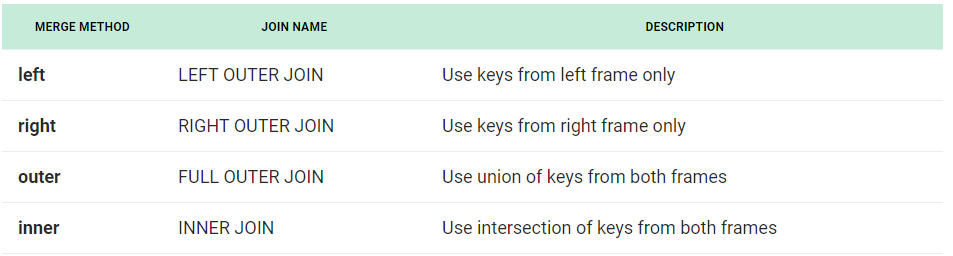

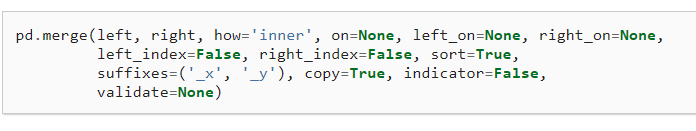

In [38]:
pd.merge?

In [24]:
df1 = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                    'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3']})
df1

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [25]:
df2 = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']})
df2

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [27]:
# Merge over the one unique key ( inner join)

result = pd.merge(df1,df2,on='key')
print(df1,df2,result,sep='\n\n')

  key   A   B
0  K0  A0  B0
1  K1  A1  B1
2  K2  A2  B2
3  K3  A3  B3

  key   C   D
0  K0  C0  D0
1  K1  C1  D1
2  K2  C2  D2
3  K3  C3  D3

  key   A   B   C   D
0  K0  A0  B0  C0  D0
1  K1  A1  B1  C1  D1
2  K2  A2  B2  C2  D2
3  K3  A3  B3  C3  D3


In [28]:
# Merge over the one unique key ( inner join)

result = pd.merge(df2,df1,on='key')
print(df1,df2,result,sep='\n\n')

  key   A   B
0  K0  A0  B0
1  K1  A1  B1
2  K2  A2  B2
3  K3  A3  B3

  key   C   D
0  K0  C0  D0
1  K1  C1  D1
2  K2  C2  D2
3  K3  C3  D3

  key   C   D   A   B
0  K0  C0  D0  A0  B0
1  K1  C1  D1  A1  B1
2  K2  C2  D2  A2  B2
3  K3  C3  D3  A3  B3


In [21]:
df3 = pd.DataFrame({'key1': ['K0', 'K1', 'K2', 'K3'],
                    'key2': ['K0', 'K1', 'K0', 'K1'],
                    'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3']})
df3

,key1,key2,A,B
0,K0,K0,A0,B0
1,K1,K1,A1,B1
2,K2,K0,A2,B2
3,K3,K1,A3,B3


In [22]:
df4 = pd.DataFrame({'key1': ['K0', 'K1', 'K2', 'K3'],
                    'key2': ['K0', 'K0', 'K0', 'K0'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']})
df4

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K2,K0,C2,D2
3,K3,K0,C3,D3


In [23]:
# inner join over multiple key
result = pd.merge(df3,df4,on=['key1','key2'])
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K2,K0,A2,B2,C2,D2


# Left outer join

In [29]:
result = pd.merge(df1,df2,on='key',how='left')
print(df1,df2,result,sep='\n\n')

  key   A   B
0  K0  A0  B0
1  K1  A1  B1
2  K2  A2  B2
3  K3  A3  B3

  key   C   D
0  K0  C0  D0
1  K1  C1  D1
2  K2  C2  D2
3  K3  C3  D3

  key   A   B   C   D
0  K0  A0  B0  C0  D0
1  K1  A1  B1  C1  D1
2  K2  A2  B2  C2  D2
3  K3  A3  B3  C3  D3


In [30]:
result = pd.merge(df3,df4,on=['key1','key2'],how='left')
print(df3,df4,result,sep='\n\n')

  key1 key2   A   B
0   K0   K0  A0  B0
1   K1   K1  A1  B1
2   K2   K0  A2  B2
3   K3   K1  A3  B3

  key1 key2   C   D
0   K0   K0  C0  D0
1   K1   K0  C1  D1
2   K2   K0  C2  D2
3   K3   K0  C3  D3

  key1 key2   A   B    C    D
0   K0   K0  A0  B0   C0   D0
1   K1   K1  A1  B1  NaN  NaN
2   K2   K0  A2  B2   C2   D2
3   K3   K1  A3  B3  NaN  NaN


# Note - 
#### If a key combination does not appear in either the left or right tables, the values in the joined table will be NA